In [2]:
import MovingProbabilityTrees as mpt
import decimal

In [9]:
depth = 22
start_percent = .50
max_percent = .70
min_percent = .30
success_change = -.10
failure_change = .10

output = mpt.probabilities(depth, start_percent, max_percent, min_percent, success_change, failure_change)
print(output)
stddev, variance, mean = mpt.calc_stats(output)
print("stddev = " + str(stddev))
print("variance = " + str(variance))
print("mean = " + str(mean))

{22: Decimal('6.9735688020E-12'), 21: Decimal('4.749775195140E-10'), 20: Decimal('1.55040514091280E-8'), 19: Decimal('3.224630061428760E-7'), 18: Decimal('0.0000047890190944051200'), 17: Decimal('0.0000538559300338542720'), 16: Decimal('0.0004732976876237176320'), 15: Decimal('0.0032931904590918328320'), 14: Decimal('0.0180578571675158730240'), 13: Decimal('0.0758082721098849523200'), 12: Decimal('0.2255005205318857479680'), 11: Decimal('0.3536157572917219530240'), 10: Decimal('0.2255005205318857479680'), 9: Decimal('0.0758082721098849523200'), 8: Decimal('0.0180578571675158730240'), 7: Decimal('0.0032931904590918328320'), 6: Decimal('0.0004732976876237176320'), 5: Decimal('0.0000538559300338542720'), 4: Decimal('0.0000047890190944051200'), 3: Decimal('3.224630061428760E-7'), 2: Decimal('1.55040514091280E-8'), 1: Decimal('4.749775195140E-10'), 0: Decimal('6.9735688020E-12')}
stddev = 1.2312377757639557
variance = 1.515946460468172690244000000
mean = 11.0000000000000000000000


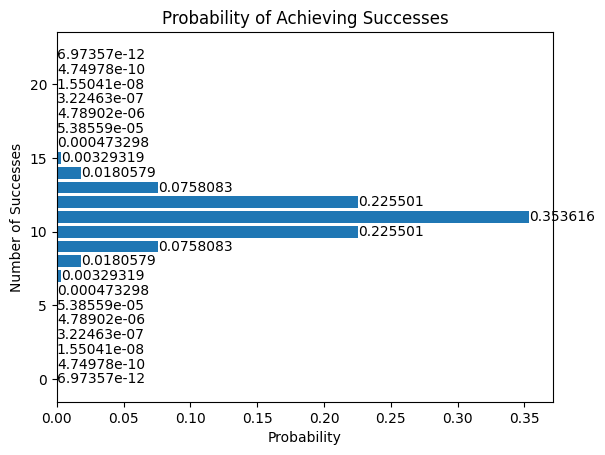

In [10]:
import matplotlib.pyplot as plt

xpoints = []
ypoints = []

for i in output:
    xpoints.append(i)
    ypoints.append(output[i])

fig, ax = plt.subplots()

bars = ax.barh(xpoints, ypoints)
ax.bar_label(bars)
plt.title("Probability of Achieving Successes")
plt.xlabel("Probability")
plt.ylabel("Number of Successes")
plt.savefig('output.png')
plt.show()

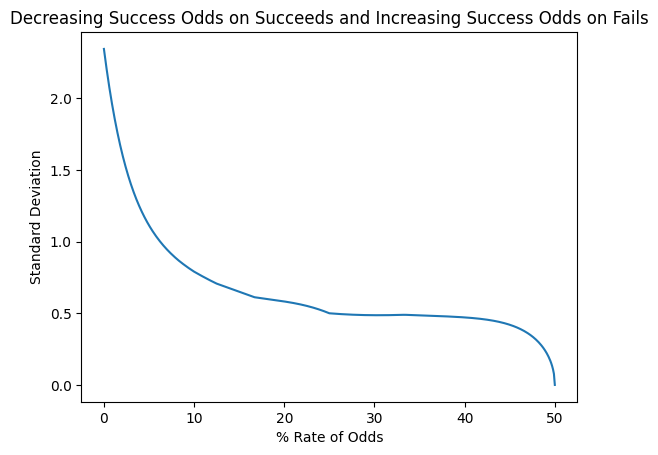

In [55]:
#WARNING, that for loop takes 30 mins to run, the one below will run in 3 if you want to try it

# for i in range(51):
#     output = mpt.probabilities(depth, start_percent, max_percent, min_percent, ((success_change * 100 - i) / 100), ((failure_change * 100 + i) / 100))
#     stddev, variance, mean = mpt.calc_stats(output)
#     xpoints.append(i)
#     ypoints.append(stddev)

#decreasing success odds when we succeed and increasing success odds when we fail

import matplotlib.pyplot as plt

depth = 22
start_percent = 0.50
max_percent = 1.00
min_percent = 0.00
success_change = 0.00
failure_change = 0.00

stddev_change = []
xpoints = []
ypoints = []

for i in range(501):
    output = mpt.probabilities(depth, start_percent, max_percent, min_percent, ((success_change * 1000 - i) / 1000), ((failure_change * 1000 + i) / 1000))
    stddev, variance, mean = mpt.calc_stats(output)
    xpoints.append(i/10)
    ypoints.append(stddev)

plt.title("Decreasing Success Odds on Succeeds and Increasing Success Odds on Fails")
plt.xlabel("% Rate of Odds")
plt.ylabel("Standard Deviation")
plt.plot(xpoints,ypoints)
plt.savefig('in_rate.png')

rmse = 0.010075287967051875
r2 = 0.9992499796039317


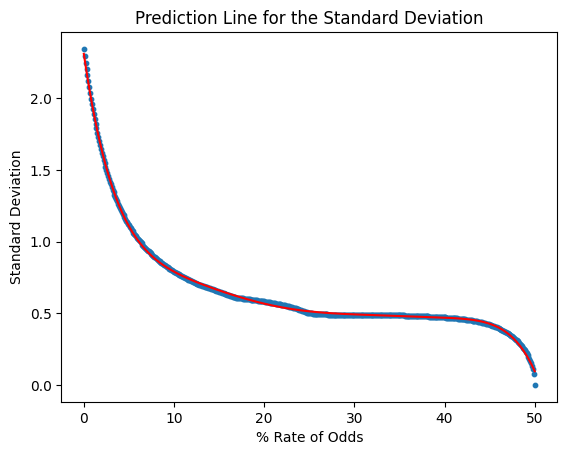

In [130]:
import operator
import numpy as np

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

x = np.array(xpoints)
y = np.array(ypoints)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=7)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print("rmse = " + str(rmse))
print("r2 = " + str(r2))

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.title("Prediction Line for the Standard Deviation")
plt.xlabel("% Rate of Odds")
plt.ylabel("Standard Deviation")
plt.plot(x, y_poly_pred, color='r')
plt.savefig('in_rate_predictions.png')
plt.show()

In [146]:
print("coefficients = " + str(model.coef_))
print("y intercept = " + str(model.intercept_))

coef = model.coef_[0]
x = 10
prediction = model.intercept_ + 0

for i in range(len(coef)):
    prediction += coef[i]*(x**i)

print("prediction for x=" + str(x) + ": " + str(prediction))

coefficients = [[ 0.00000000e+00 -4.30679862e-01  5.37685925e-02 -3.86677433e-03
   1.61879859e-04 -3.89449837e-06  4.99718601e-08 -2.65324207e-10]]
y intercept = [2.31063941]
prediction for x=10: [0.79059308]


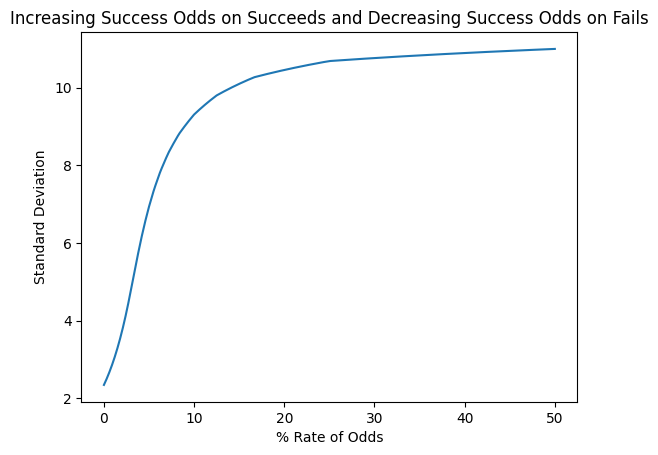

In [147]:
#WARNING, that for loop takes 30 mins to run, the one below will run in 3 if you want to try it

# for i in range(51):
#     output = mpt.probabilities(depth, start_percent, max_percent, min_percent, ((success_change * 100 + i) / 100), ((failure_change * 100 - i) / 100))
#     stddev, variance, mean = mpt.calc_stats(output)
#     xpoints.append(i)
#     ypoints.append(stddev)

#increasing success odds when we succeed and decreasing success odds when we fail

import matplotlib.pyplot as plt

depth = 22
start_percent = 0.50
max_percent = 1.00
min_percent = 0.00
success_change = 0.00
failure_change = 0.00

stddev_change = []
xpoints = []
ypoints = []

for i in range(501):
    output = mpt.probabilities(depth, start_percent, max_percent, min_percent, ((success_change * 1000 + i) / 1000), ((failure_change * 1000 - i) / 1000))
    stddev, variance, mean = mpt.calc_stats(output)
    xpoints.append(i/10)
    ypoints.append(stddev)

plt.title("Increasing Success Odds on Succeeds and Decreasing Success Odds on Fails")
plt.xlabel("% Rate of Odds")
plt.ylabel("Standard Deviation")
plt.plot(xpoints,ypoints)
plt.savefig('out_rate.png')

rmse = 0.11833485625523972
r2 = 0.9965586830272958


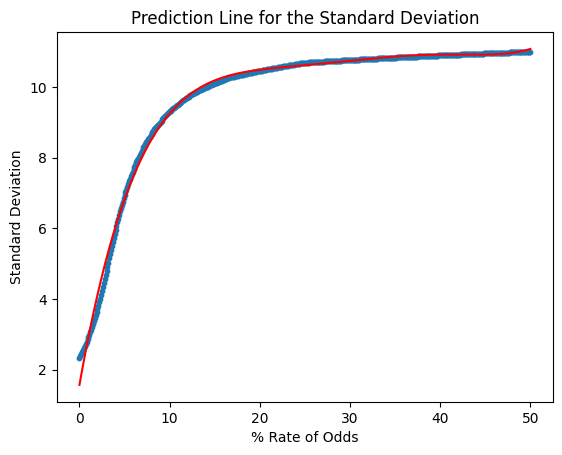

In [178]:
import operator
import numpy as np

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

x = np.array(xpoints)
y = np.array(ypoints)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=6)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print("rmse = " + str(rmse))
print("r2 = " + str(r2))

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.title("Prediction Line for the Standard Deviation")
plt.xlabel("% Rate of Odds")
plt.ylabel("Standard Deviation")
plt.plot(x, y_poly_pred, color='r')
plt.savefig('out_rate_predictions.png')
plt.show()

In [179]:
print("coefficients = " + str(model.coef_))
print("y intercept = " + str(model.intercept_))

coef = model.coef_[0]
x = 10
prediction = model.intercept_ + 0

for i in range(len(coef)):
    prediction += coef[i]*(x**i)

print("prediction for x=" + str(x) + ": " + str(prediction))

coefficients = [[ 0.00000000e+00  1.45009110e+00 -9.36972359e-02  2.96263399e-03
  -4.37389837e-05  2.02506517e-07  7.04086567e-10]]
y intercept = [1.57158274]
prediction for x=10: [9.24896905]
